<a href="https://colab.research.google.com/github/kashish-lang/Walmart-sales-and-inventory-analysis/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 ) Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

In [ ]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('walmart_data.csv')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
75128,1005575,P00176942,M,36-45,7.0,C,2,0.0,5.0,1972.0
75129,1005575,P00189242,M,36-45,7.0,C,2,0.0,5.0,5425.0
75130,1005575,P00077942,M,36-45,7.0,C,2,0.0,5.0,5198.0
75131,1005575,P00258842,M,36-45,7.0,C,2,0.0,5.0,5430.0


In [ ]:
df.shape

(75133, 10)

In [ ]:
df.nunique()

,0
User_ID,5692
Product_ID,3229
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,18
Purchase,13038


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,7.513300e+04,75132.000000,75132.000000,75132.000000,75132.000000
mean,1.002905e+06,8.102500,0.406937,5.302228,9298.807619
std,1.671908e+03,6.514722,0.491266,3.728501,4965.135617
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001447e+06,2.000000,0.000000,1.000000,5863.000000
50%,1.002946e+06,7.000000,0.000000,5.000000,8051.000000
75%,1.004310e+06,14.000000,1.000000,8.000000,12043.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23958.000000


#2 ) Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

Detect null values

In [ ]:
null_counts = df.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


In [ ]:
df.isnull().values.any()

np.True_

In [ ]:
df.dropna(inplace=True)

In [ ]:
print("Null counts after dropping rows with missing values:")
print(df.isnull().sum())

Null counts after dropping rows with missing values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


Summary statistics with describe()

In [ ]:
df['Purchase'].describe()

,Purchase
count,75132.000000
mean,9298.807619
std,4965.135617
min,185.000000
25%,5863.000000
50%,8051.000000
75%,12043.000000
max,23958.000000


Mean = 9326.964489\
Median = 8061\
There is a huge difference 1265.964489 between mean and median -> Its likely right skewed with outliers on the high side

Outlier detection

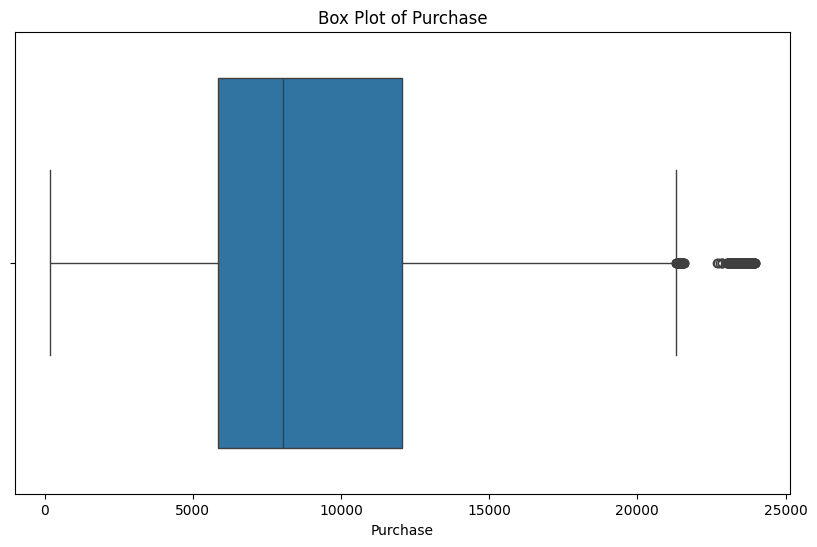

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Box Plot of Purchase')
plt.show()

#3 ) Do some data exploration steps like:

1)Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [ ]:
gender_avg = df.groupby('Gender')['Purchase'].mean()
print(gender_avg)

Gender
F    8780.111166
M    9464.059671
Name: Purchase, dtype: float64


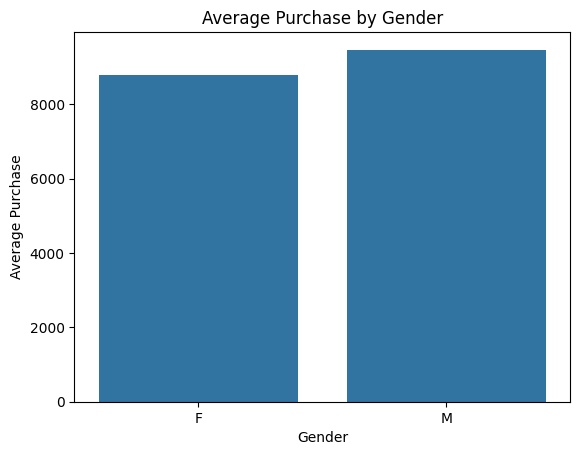

In [ ]:
sns.barplot(x=gender_avg.index, y=gender_avg.values)
plt.title('Average Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.show()

2)Inference after computing the average female and male expenses.

- Male customers spend more than female customers on purchase
- The difference is 687.9595370000006 more per male customer

The difference in average spending could be influenced by factors like \
- Product category preferences
- Marketing strategies targeting each gender
- Income differences or spending habits
These insights can help tailor marketing campaigns, product recommandations and pricing strategies more effectively for each gender group

3)Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [ ]:
from scipy.stats import norm
female_data = df[df['Gender']=='F']['Purchase']
sample_mean = female_data.mean()
sample_std = female_data.std()
n = female_data.count()
sample_error = sample_std / np.sqrt(n)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Margin of error
margin_of_error = z * sample_error

# Confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for Female Customers: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Female Customers: (8712.06, 8848.17)


Based on the sample of female customers, we are 95% confidence that thee true average spending of the entire population of female customers lies between 8777.93 and 8838.77

In [ ]:
male_data = df[df['Gender']=='M']['Purchase']
sample_mean = male_data.mean()
sample_std = male_data.std()
n = male_data.count()
sample_error = sample_std / np.sqrt(n)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Margin of error
margin_of_error = z * sample_error

# Confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval for Male Customers: ({lower_bound:.2f}, {upper_bound:.2f})")

95% Confidence Interval for Male Customers: (9422.66, 9505.46)


Based on the sample of male customers, we are 95% confidence that thee true average spending of the entire population of male customers lies between 9477.72 and 9514.90

#4 ) Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

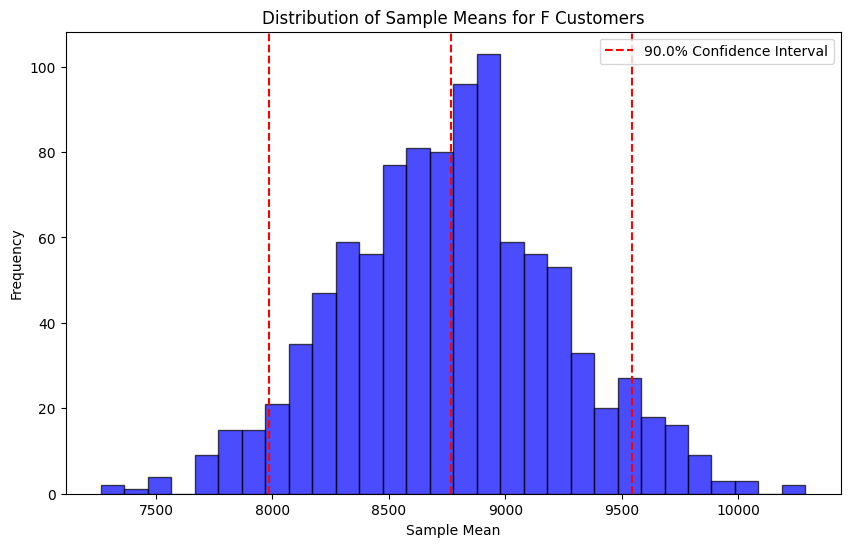

90% Confidence Interval for F Customers: (7986.66, 9542.43)


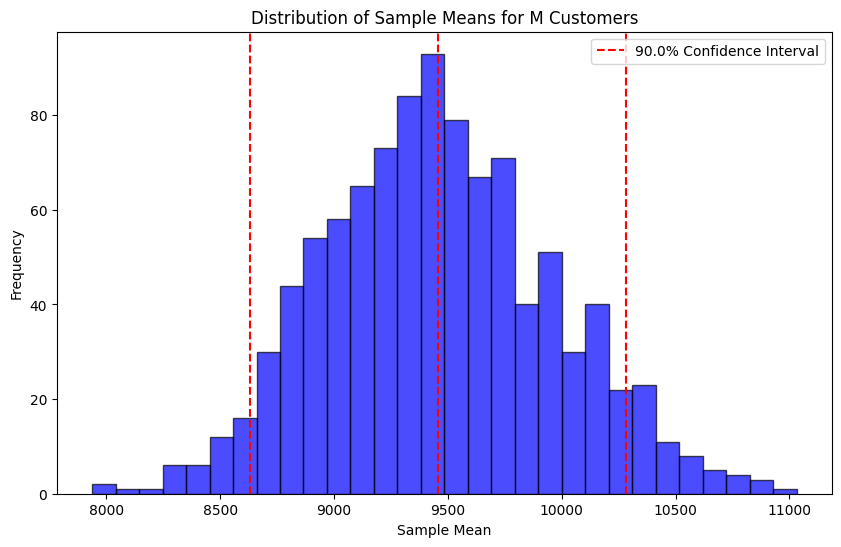

90% Confidence Interval for M Customers: (8630.75, 10284.26)


In [ ]:
female_purchases = df[df['Gender']=='F']['Purchase']
male_purchases = df[df['Gender']=='M']['Purchase']

def simulate_clt(data, sample_size=100, num_samples=1000, confidence=0.95, Gender='F'):
    sample_means = []
    for _ in range(num_samples):
      sample=np.random.choice(data, size=sample_size)
      sample_mean = sample.mean()
      sample_means.append(sample_mean)
    sample_means = np.array(sample_means)

    mean=np.mean(sample_means)
    std=np.std(sample_means)
    z=norm.ppf(1-(1-confidence)/2)
    margin = z*std

    lower = mean - margin
    upper = mean + margin

    plt.figure(figsize=(10, 6))
    plt.hist(sample_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(lower, color='red', linestyle='--', label=f'{100 * confidence}% Confidence Interval')
    plt.axvline(upper, color='red', linestyle='--')
    plt.axvline(mean, color='red', linestyle='--')
    plt.title(f'Distribution of Sample Means for {Gender} Customers')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    print(f"{int(confidence*100)}% Confidence Interval for {Gender} Customers: ({lower:.2f}, {upper:.2f})")

simulate_clt(female_purchases, sample_size=100, confidence=0.90, Gender='F')
simulate_clt(male_purchases, sample_size=100, confidence=0.90, Gender='M')


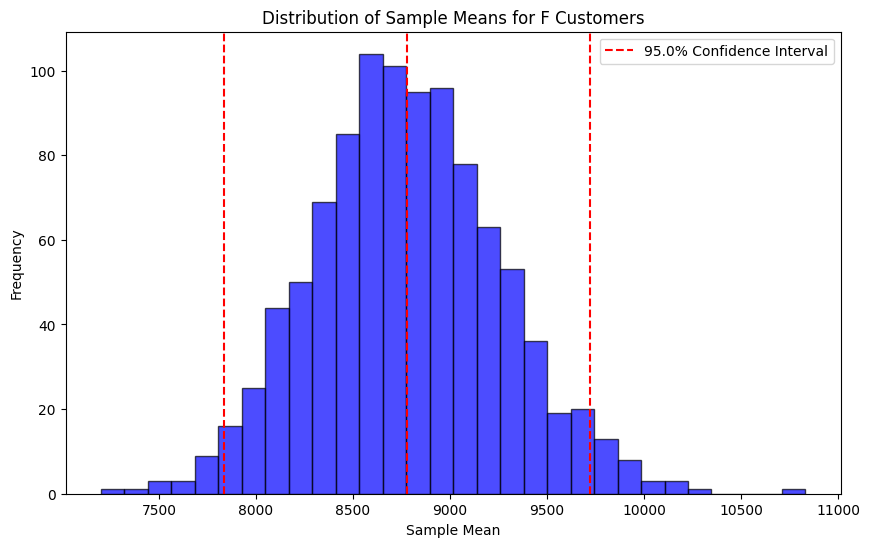

95% Confidence Interval for F Customers: (7835.57, 9718.82)


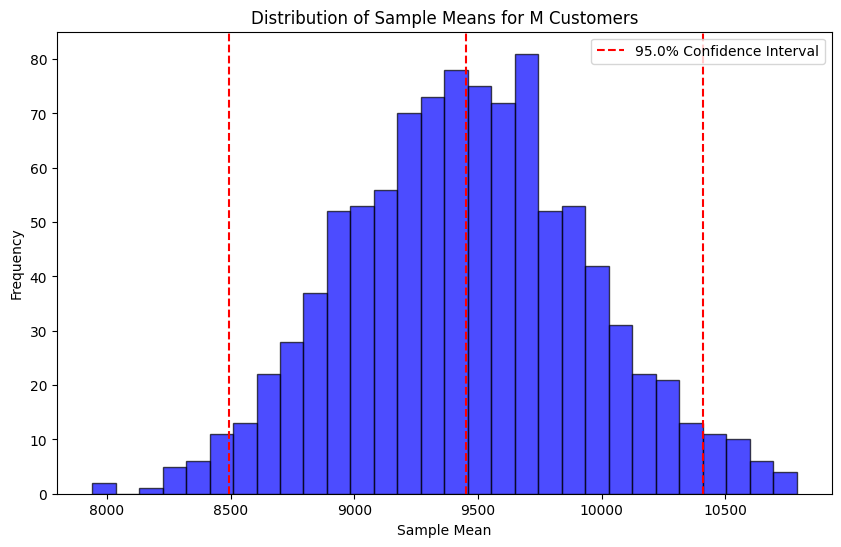

95% Confidence Interval for M Customers: (8495.60, 10409.13)


In [ ]:
simulate_clt(female_purchases, sample_size=100, confidence=0.95, Gender='F')
simulate_clt(male_purchases, sample_size=100, confidence=0.95, Gender='M')

#5 ) Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

Using the central limit theorem and confidence interval:
- We calculated 95% confidence for average spending of male and female
- The average male purchase amount was higher than the female purchase amount

Do the intervals overlap ?
- No, the intervals do not overlap
- This shows the statistical significant difference between spending behavior of male and female customers

How can Walmart leverage this insight ?
- Higher spending male customers can be targeted with premium and bundle offers
- Female customers might prefer different product types or price ranges -
    - So Walmart could highlight value based offers
    - Use personalize recommandation
- Optimaize inventory based on gender specific patterns
- Create gender tailored advertisement for special events

#6 ) Perform the same activity for Married vs Unmarried and Age

For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

In [ ]:
def compute_confidence_interval(data, confidence=0.95, label='Group'):
  sample_mean=data.mean()
  sample_std=data.std()
  n=data.count()
  sample_error = sample_std / np.sqrt(n)
  z=norm.ppf(1-(1-confidence)/2)
  margin = z*sample_error
  lower = sample_mean - margin
  upper = sample_mean + margin
  print(f"{int(confidence*100)}% Confidence Interval for {label}: ({lower:.2f}, {upper:.2f})")

# Marital status analysis
married = df[df['Marital_Status']==1]['Purchase']
unmarried = df[df['Marital_Status']==0]['Purchase']
ci_married = compute_confidence_interval(married, confidence=0.95, label='Married')
ci_unmaried = compute_confidence_interval(unmarried, confidence=0.95, label='Unmarried')

age_bins = {
    "0-17":[],
    "18-25":[],
    "26-35":[],
    "36-50":[],
    "51+":[]
}

for group in df['Age'].unique():
  if group in ["0-17"]:
    age_bins["0-17"].append(group)
  elif group in ["18-25"]:
    age_bins["18-25"].append(group)
  elif group in ["26-35"]:
    age_bins["26-35"].append(group)
  elif group in ["36-50"]:
    age_bins["36-50"].append(group)
  else:
    age_bins["51+"].append(group)

print("\n Age wise analysis")
for label, age_group in age_bins.items():
  age_data = df[df['Age'].isin(age_group)]['Purchase']
  compute_confidence_interval(age_data, confidence=0.95, label=label)

95% Confidence Interval for Married: (9255.45, 9366.08)
95% Confidence Interval for Unmarried: (9244.31, 9336.90)

 Age wise analysis
95% Confidence Interval for 0-17: (8841.84, 9291.93)
95% Confidence Interval for 18-25: (9081.88, 9247.36)
95% Confidence Interval for 26-35: (9239.87, 9352.71)
95% Confidence Interval for 36-50: (nan, nan)
95% Confidence Interval for 51+: (9324.78, 9437.69)


In [ ]:
df[df['Age']=='36-50']==True

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


#7 ) Give recommendations and action items to Walmart.

Summary :     
- Male customers spend more than female customers
- Married people are spending more than the unmarried
- Age groups ['26-35'] and ['51+'] are the highest spending segments

Insights and Recommandation\
1) Segment specific marketing

|Segment               |Insight                 |Action item
|----------------------|---------------------------|----------------------|
|Male                  |Higher spending overall    |Promote high value products
|Female                |Lower spending overall     |Offer discounts
|Married               |Likely shopping for family |Push family packs, groceries
|Unmarried             |Spending on personal thongs|Target Fashion and gadgets
|51+                   |Peak spending group        |Senior healthcare

2) Product placement strategy
- Store level and online banners should reflect the most relevent products to the dominant customer profile
- Create category banners differently for each age group :        
  - For Young adults : Fashion , Gadgets
  - For Mid age adults : Groceries, Parenting items
  - For seniors : Healthcare

3) Special offers
- Special offers on wedding season for newly wed couple
- Back to school / College promos for youngers
- Holiday bundles for mid aged groups with family

By leveraging demographic-specific purchasing behavior, Walmart can -
- Boost revenue through targeted marketing
- Enhance customer satisfaction via personalization
- Optimize inventory and campaigns with confidence interval based insights

#1 ) Defining Problem Statement and Analyzing basic metrics (10 Points)

Walmart, a leading multinational retail corporation, seeks to analyze the purchasing behavior of its customers to make data-driven business decisions. The key objective to evaluate whether there is a significant difference between prchase amount of male and female customers. In addition to gender, age, marital status, occupation, city category will also be analyzed to uncover patterns that influence consumer spending.
The insights gained will enable Walmart to personalize offers, optimize inventory planning, and enhance overall customer satisfaction.

1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
df.shape

(75132, 10)

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category,float64
Purchase,float64


In [ ]:
cat_cols = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
df[cat_cols]=df[cat_cols].astype('category')

In [ ]:
print('Summary of numerical data',df.describe())

Summary of numerical data             User_ID    Occupation  Marital_Status  Product_Category  \
count  7.513200e+04  75132.000000    75132.000000      75132.000000   
mean   1.002905e+06      8.102500        0.406937          5.302228   
std    1.671891e+03      6.514722        0.491266          3.728501   
min    1.000001e+06      0.000000        0.000000          1.000000   
25%    1.001447e+06      2.000000        0.000000          1.000000   
50%    1.002946e+06      7.000000        0.000000          5.000000   
75%    1.004310e+06     14.000000        1.000000          8.000000   
max    1.006040e+06     20.000000        1.000000         18.000000   

           Purchase  
count  75132.000000  
mean    9298.807619  
std     4965.135617  
min      185.000000  
25%     5863.000000  
50%     8051.000000  
75%    12043.000000  
max    23958.000000  


In [ ]:
print('Summary of categorical data',df.describe(include='category'))

Summary of categorical data        Product_ID Gender    Age City_Category Stay_In_Current_City_Years
count       75132  75132  75132         75132                      75132
unique       3228      2      7             3                          5
top     P00265242      M  26-35             B                          1
freq          237  56979  29694         31926                      26365


2. Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
df.nunique()

,0
User_ID,5692
Product_ID,3228
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,18
Purchase,13038


In [ ]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1006040  P00300542   M       26-35  6.0         B              2                           0.0             8.0               9751.0      1
1000001  P00069042   F       0-17   10.0        A              2                           0.0             3.0               8370.0      1
         P00085442   F       0-17   10.0        A              2                           0.0             12.0              1057.0      1
         P00085942   F       0-17   10.0        A              2                           0.0             2.0               12842.0     1
         P00087842   F       0-17   10.0        A              2                           0.0             12.0              1422.0      1
                                                                                                                                        ..
1000004  P00346142   M       46-50  7.0         B              2                           1.0             1.0               15854.0     1
         P00184942   M       46-50  7.0         B              2                           1.0             1.0               19215.0     1
         P00046742   M       46-50  7.0         B              2                           1.0             1.0               15852.0     1
1000003  P0098342    M       26-35  15.0        A              3                           0.0             1.0               15424.0     1
         P00193542   M       26-35  15.0        A              3                           0.0             1.0               15227.0     1
Name: count, Length: 75132, dtype: int64

3. Visual Analysis - Univariate & Bivariate
- For continuous variable(s): Distplot, countplot, histogram for univariate analysis
- For categorical variable(s): Boxplot
- For correlation: Heatmaps, Pairplots


<ipython-input-28-fcce7ff89e55>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], kde=True)


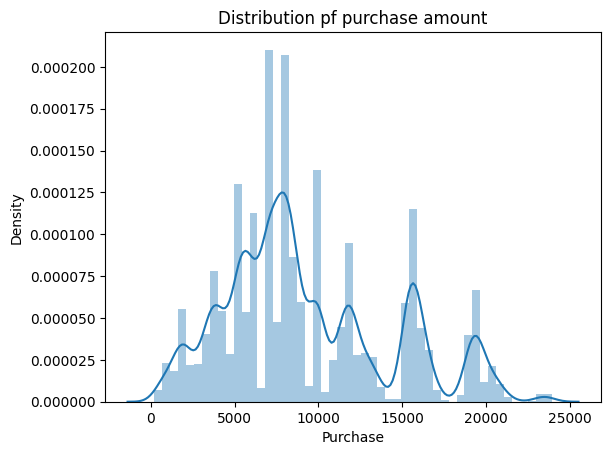

In [ ]:
# for continuous variables
sns.distplot(df['Purchase'], kde=True)
plt.title('Distribution pf purchase amount')
plt.show()

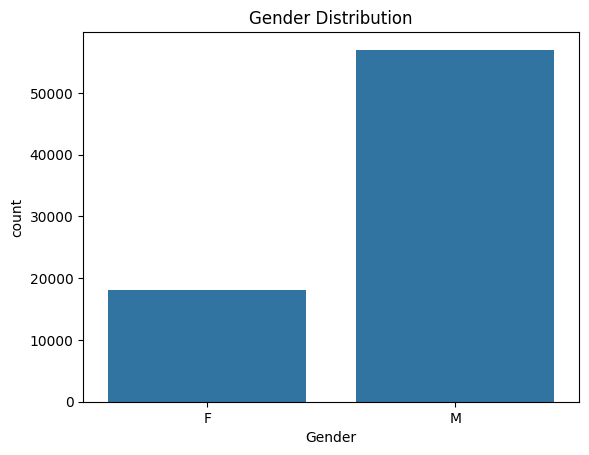

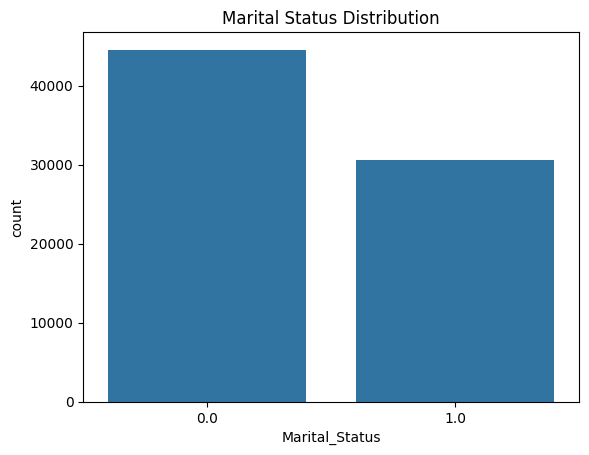

In [ ]:
# for categorical
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x='Marital_Status', data=df)
plt.title("Marital Status Distribution")
plt.show()

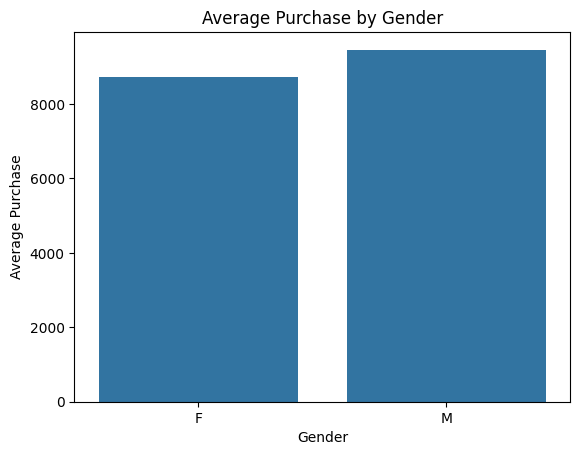

In [ ]:
sns.barplot(x=gender_avg.index, y=gender_avg.values)
plt.title('Average Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.show()

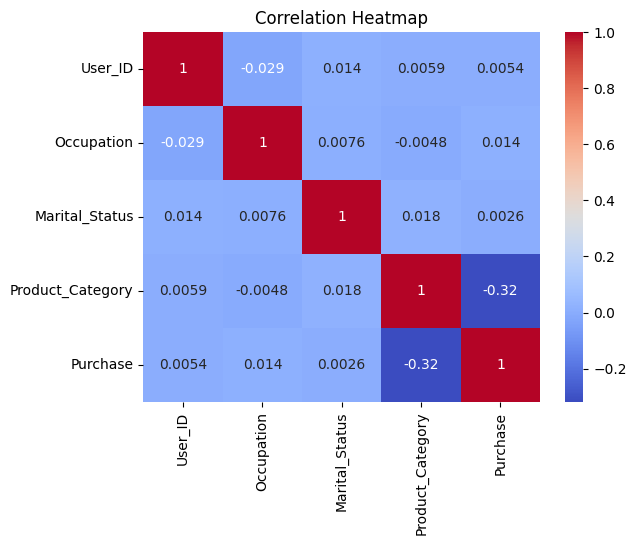

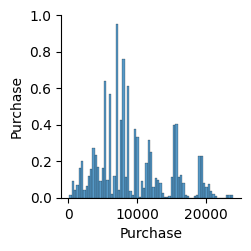

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# For continuous variables only
sns.pairplot(df[['Purchase']])
plt.show()


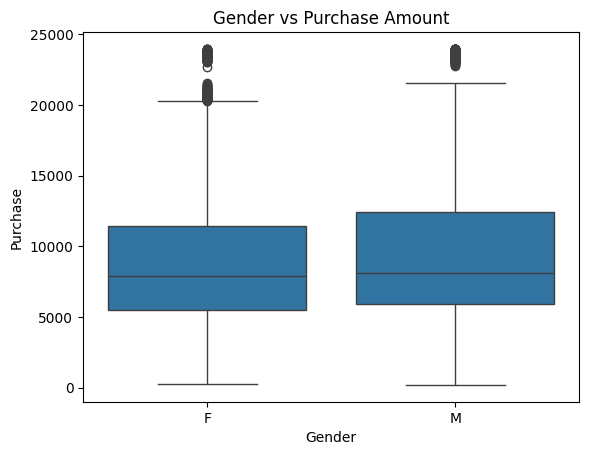

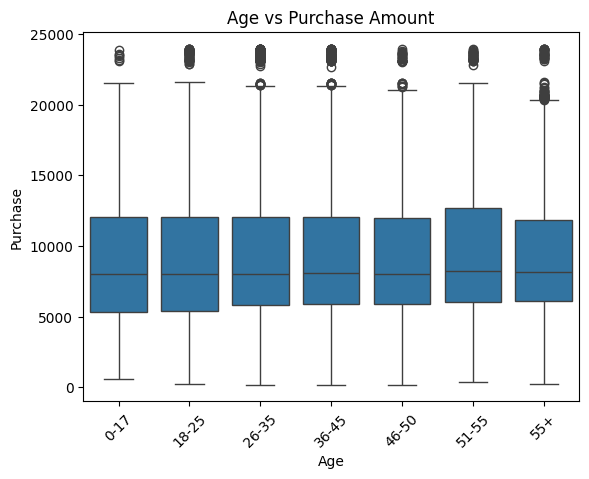

In [ ]:
#Boxplot for category vs caontinuous
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Gender vs Purchase Amount")
plt.show()

sns.boxplot(x='Age', y='Purchase', data=df)
plt.title("Age vs Purchase Amount")
plt.xticks(rotation=45)
plt.show()


#2 ) Missing Value & Outlier Detection (10 Points)

There was only two null values, one in purchase and one in a product category

In [ ]:
print("Null counts after dropping rows with missing values:")
print(df.isnull().sum())

Null counts after dropping rows with missing values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


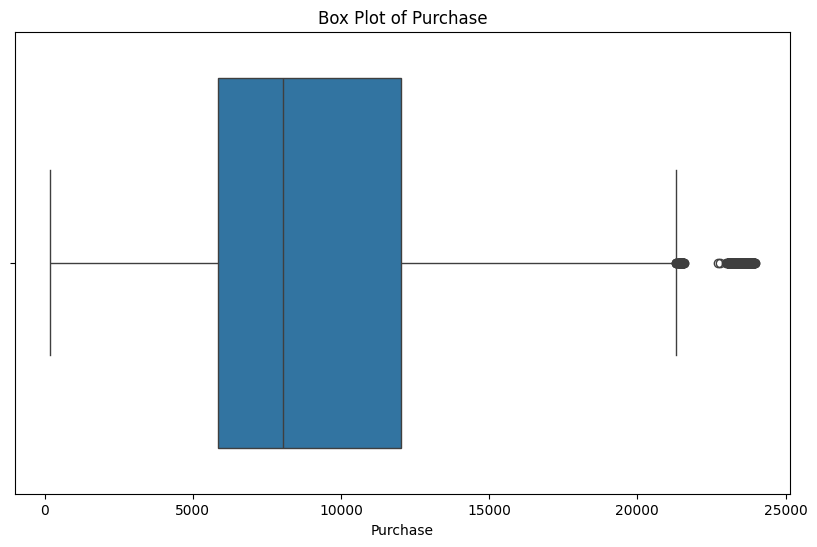

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Box Plot of Purchase')
plt.show()

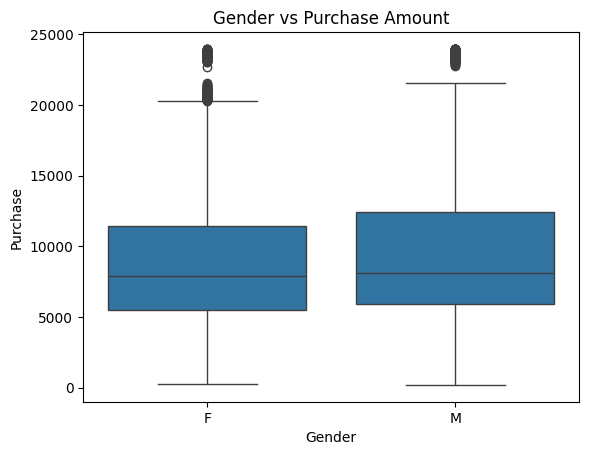

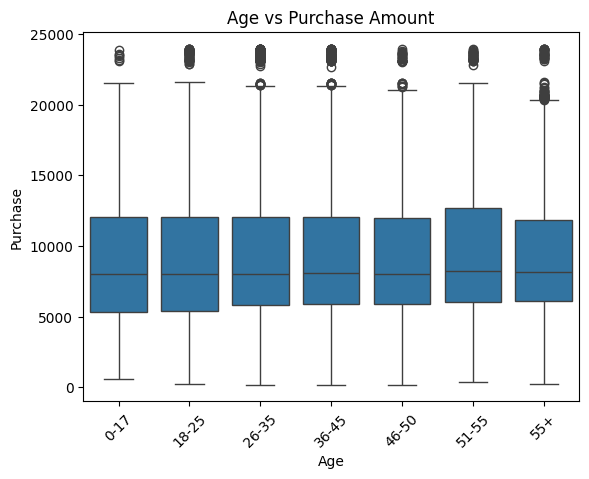

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Gender vs Purchase Amount")
plt.show()

sns.boxplot(x='Age', y='Purchase', data=df)
plt.title("Age vs Purchase Amount")
plt.xticks(rotation=45)
plt.show()

#3 ) Business Insights based on Non- Graphical and Visual Analysis (10 Points)


- Comments on the range of attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plot


In [ ]:
df['Purchase'].max()

23958.0

In [ ]:
df['Purchase'].min()

185.0

1. Comments on the range of attributes

- Purchase amount ranges from a minimum of 185 to maximum of 23985, indicating a wide range of spending behaviors.
- User id and Product id are anonymized but both a large number of unique values, confirming good data diversity.
- Categorical variables like Gender, Age, Marital status, City category have well-distributed value counts.

2. Comments on the distribution of the variables and relationship between them

- Gender
     - Male customers are more than female customers.
     - Walmart should focus on the female-focused campaigns.
- Age
     - Age group of 26-35 and 51+ have the most active customer segment.
     - Promotions should target on this age group for maximum impact.
- Marital status
     - Married customers are spending on purchase more than unmarried.
     - Married people represent the family-focused products, so product bundles for families would work well.
- Purchase
     - The distribution is right-skewed as many are spending between 0-10000 and few are spending more.
     - High spenders are low, so Walmart should launch loyalty programs for these customers to boost retention.
- Gender vs Purchase
     - Males show the slightly higher purchase than the females.
- Age vs Purchase
     - Age group of 26-35 and 51+ are spending more.
- Marital status vs Purchase
     - Married customers are spending more than unmarried

3. Comments for each univariate and bivariate plot

- Purchase (distplot)
      - The distribution of purchase is right-skewed as most of the customers are spending between 0-10000 and few are spending more.
- Gender (Countplot)
      - The count of male customers are more than female customers.
- Marital status (Countplot)
      - The count of unmarried customers are more than married customers but average spending of married customers are more than unmarried.
- Gender vs Purchase (Boxplot)
      - There are more outliers in the female customers list.
- Age vs Purchase (Boxplot)
      - As 51+ age group has most spending power, this group also consists most outliers.

#4 ) Answering questions (50 Points)

1. Are women spending more money per transaction than men? Why or Why not? (10 Points)

- No, women are not spending more per transaction than man.
- On average, man customers have the slightly higher purchase than female customers based on both mean and boxplot analysis.

Why ? \
This may be due to -
- Man making higher value but fewer transactions.
- Product preference differences.
- A higher number of male tech and gadget purchases, which typically have higher price tags.

Insight for Walmart        
Walmart could encourage more high ticket purchases by female customers through -
- Personalized promotions
- Exclusive discounts
- Bundling offers tageting female customers.

In [ ]:
df.groupby('Gender')['Purchase'].mean()

<ipython-input-32-a45fe475426a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender')['Purchase'].mean()


,Purchase
Gender,
F,8780.111166
M,9464.059671


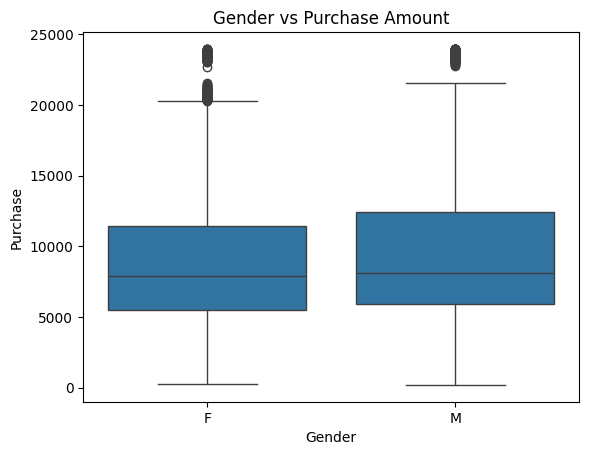

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Gender vs Purchase Amount")
plt.show()

In [ ]:
from  scipy.stats import ttest_ind
male_spend = df[df['Gender']=='M']['Purchase']
female_spend = df[df['Gender']=='F']['Purchase']
t_statistic, p_value = ttest_ind(male_spend, female_spend)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 16.19067198419351
P-value: 7.38499912428937e-59


Because p-value is less than 0.05 means the difference is statistically significant.

2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)

- Using the CLT, we computed sample means and confidence intervals for both the genders.

95% Confidence Interval for Male Customers: (9422.66, 9505.46)

95% Confidence Interval for Female Customers: (8712.06, 8848.17)

The sampling distribution of mean is roughly normal, showing that the CLT applies well even the original data is skewed.

3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)

No, the confidence intervals do not overlap, suggesting the statistically significant behavior in spending of male and female customers.

How Walmart can use this:

- Walmart can segment marketing efforts: promote high-value products to men and create targeted upselling campaigns for women.

- For categories where women dominate (e.g., fashion, home decor), Walmart can introduce reward points or cashback to encourage higher basket values.

- Walmart could also analyze product-level preferences within genders for sharper targeting.

4. Results when the same activity is performed for Married vs Unmarried (10 Points)

After computing averages and confidence intervals:

- Married customers have a slightly higher average spending than unmarried customers.

- Confidence intervals may slightly overlap, meaning the difference isn't as pronounced as in gender.

Insight for Walmart:

- Consider family-focused marketing (e.g., grocery bundles, back-to-school kits, or parenting deals).

- Develop targeted loyalty programs for families and long-term customers.

5. Results when the same activity is performed for Age (10 Points)

When divided into life stage bins:

- Customers aged 26–35 and 51+ show the highest average purchases.

- Younger (0–17) customers spend significantly less.

- Confidence intervals for high-spending groups don’t overlap with low-spending ones.

Business Use:

- Focus campaigns on working-age professionals.

- Run age-specific promotions (e.g., student discounts, senior citizen deals).

- Develop targeted messaging per age group — e.g., tech deals for 26–35, health products for 50+.

#5 ) Final Insights (10 Points) - Illustrate the insights based on exploration and CLT

1. Comments on the Distribution of Variables & Relationships

- Most variables like Purchase are right-skewed, meaning majority of transactions are low to mid-range, with a few high-value purchases.

- The Age, Gender, Marital_Status, and City_Category distributions show Walmart’s core customer base is young, and male.

- Spending behavior shows mild to moderate variation across these demographic segments, but not extreme shifts.

2. Comments on Univariate & Bivariate Plots

Univariate

- Age: Majority in 26–35 group → potential to focus marketing here.

- Purchase: Skewed → most customers are low to mid spenders.

- Gender: More males → potential to increase female engagement.

Bivariate

- Gender vs Purchase: Males spend slightly more → tailor offers to increase female cart size.

- Marital_Status vs Purchase: Married customers spend more → leverage family-oriented bundles.

- Age vs Purchase: 26–50 years spend most → target mid-aged working professionals.

- City_Category: Similar spending across cities → pricing can be standardized across regions.

3. Generalization to Population Using CLT

- Sample means of purchase values were normally distributed, even if raw data wasn’t.

- Confidence Intervals for each group showed statistically significant differences in spending between:
 - Male vs Female (not overlapping)
 - Married vs Unmarried (slightly overlapping)
 - Age groups (younger vs older: not overlapping)

This means these sample insights can be generalized to the population, assuming similar customer behavior across Walmart’s 100 million user base.

#6 ) Recommendations (10 Points)

Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

- Target Young Adults (26–35 years)
  - Focus offers, ads, and loyalty programs on this age group—they spend the most.

- Encourage Higher Spending from Women
  - Run exclusive deals or personalized bundles to increase purchase amounts by female customers.

- Offer Family-Focused Promotions
  - Married customers spend more—launch bundle offers for families, like grocery + home needs packs.

- Simplify Offers for All City Categories
  - Since spending patterns are similar across cities, use the same pricing strategy across regions.

- Highlight High-Value Products for Men
  - Men are more likely to spend big—promote electronics, appliances, and gadgets more aggressively to them.

- Reward Repeat Customers
  - Launch a loyalty or cashback program for frequent shoppers to increase customer retention.

- Create Age-Specific Campaigns
  - Run targeted ads: tech for younger users, home essentials for older users, and lifestyle offers for mid-age users.

- Launch Limited-Time "Black Friday Boost" Offers
  - Increase urgency and excitement with flash deals and countdowns during Black Friday week.

- Use Gender-Based Personalization
  - Customize homepage banners or emails based on gender-preferred categories.

- Track and Adapt Monthly
  - Regularly review spending patterns by gender, age, and marital status to adjust marketing strategies quickly.